In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Importing the data 

In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv")

In [4]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [5]:
# checking if it has missing values 

In [6]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# shape of the data 

In [8]:
print(data.shape)

(506, 13)


In [9]:
# The number of missing observations in each atttribute is quite low so they will be removed 

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
# The target variable is Medv ; which represents median house value 

In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [16]:
import seaborn as sns 

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

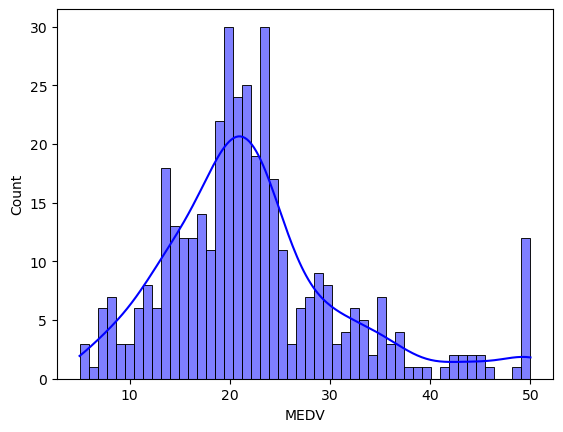

In [18]:
sns.histplot(data=data,x='MEDV',color='blue',bins=50,kde=True)

In [19]:
# the feature set are all the other variables 

<AxesSubplot:>

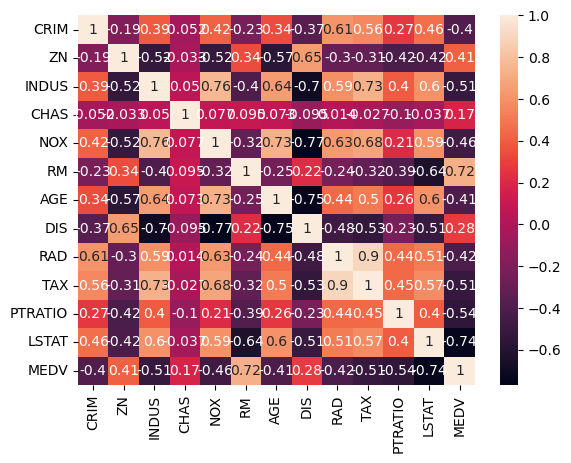

In [20]:
sns.heatmap(data.corr(),annot=True)

In [21]:
# data preprocessing

In [97]:
y=data['MEDV'].values
X=data.drop(columns=['MEDV']).values

In [98]:
X[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 2.9400e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 5.2100e+00]])

In [99]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 28.7])

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [102]:
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (315, 12) (315,)
Test set: (79, 12) (79,)


In [103]:
# creating the regression tree 

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
reg_tree=DecisionTreeRegressor(criterion='squared_error')

In [109]:
# Training the model 

In [110]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [111]:
# model evaluation 

In [112]:
reg_tree.score(X_test,y_test)

0.8433743365452597

In [113]:
prediction=(reg_tree.predict(X_test))

In [114]:
print(prediction)

[21.4 24.1 23.2 13.4 43.1 50.  29.1 18.6 28.2 21.2 15.1 19.4 11.8 42.3
 14.3 25.3 20.1 24.6 15.  29.  29.6 22.3 13.4 22.5 15.   5.  24.3  6.3
 23.6 16.2 14.1 23.7 29.4 21.7 34.9 18.8 50.  11.  33.4 13.1 30.3 24.7
 13.1 19.3 18.1 50.  18.8 24.1 24.3 19.5 21.4 29.4 29.9 20.  15.1 29.
 10.8 20.2 13.5 14.1  8.8 22.2 34.9 21.  32.  26.2  7.4 18.2 10.9 14.4
 25.  38.7 15.  23.9 13.9 15.4 20.2 19.5 19.3]


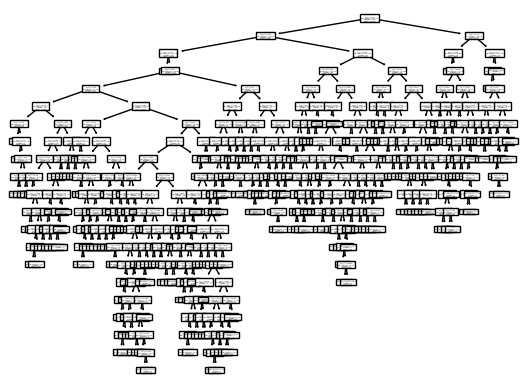

In [119]:
import sklearn.tree as tree
tree.plot_tree(reg_tree)
plt.show()